In [163]:
# Import most common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Titanic Survival Prediction

This notebook is inspired in the Kaggle competition [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal of this competition is to predict whether a passenger survived the Titanic disaster based on passenger data. The data is split into a training set and a test set. The training set is used to train the model, and the test set is used to evaluate the model. The test set does not contain the survival data, so the model is evaluated by submitting the predictions to Kaggle and comparing the predictions to the actual survival data.

In [111]:
titanic = pd.read_csv('titanic.csv')

## Data Exploration

In [112]:
# Check the first 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# Summary of the dataset
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
# Check the info of the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
# Null values in the dataset
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
# Check the number of passengers survived and not survived
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [117]:
# Check Class wise passengers
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [118]:
titanic.shape

(891, 12)

## Visualizing the Data

### Correlation plot

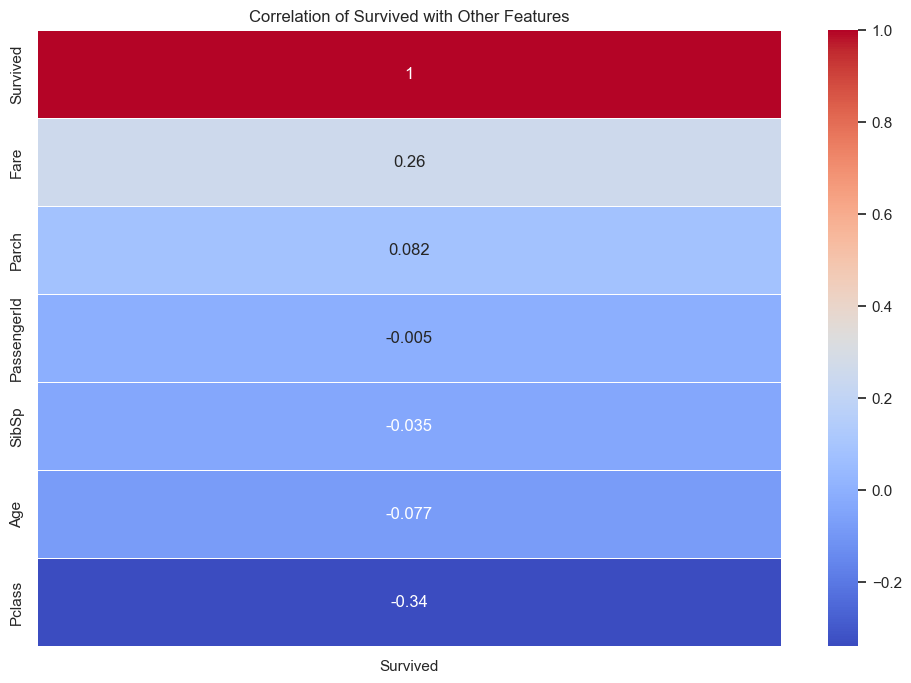

In [119]:
# Compute the correlation matrix for 'Survived' with other features
correlation_matrix = titanic.corr().loc['Survived', :].sort_values(ascending=False)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Survived with Other Features')
plt.show()

### Passengers Survived

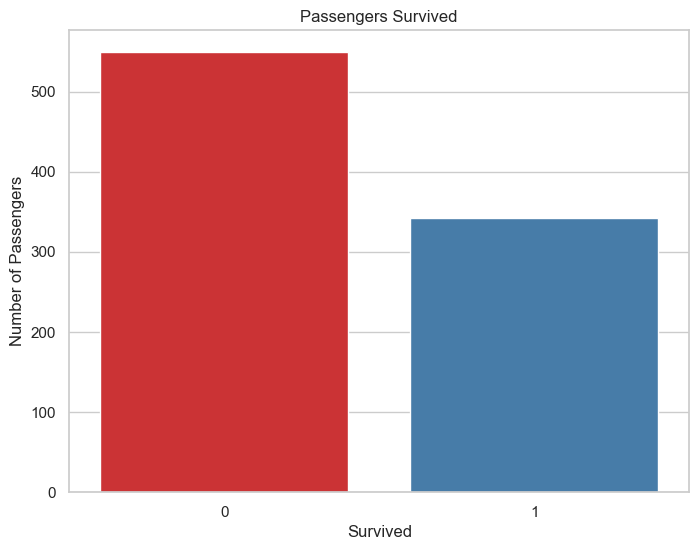

In [120]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Survived", palette="Set1")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived")
plt.show()

### Passengers by Class

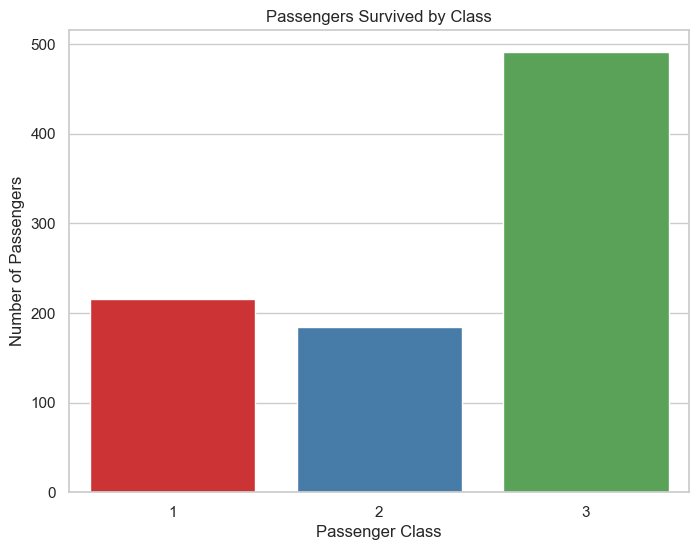

In [121]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Pclass", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Class")
plt.show()

### Survival by Class

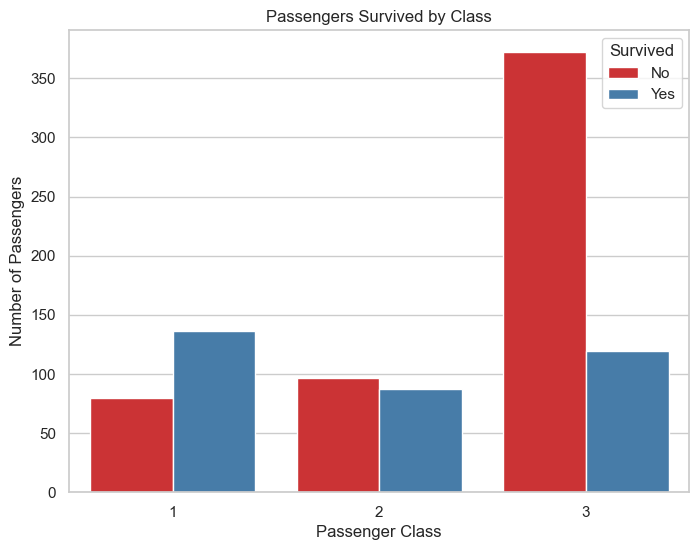

In [122]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Pclass", hue="Survived", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Class")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Passengers by Gender

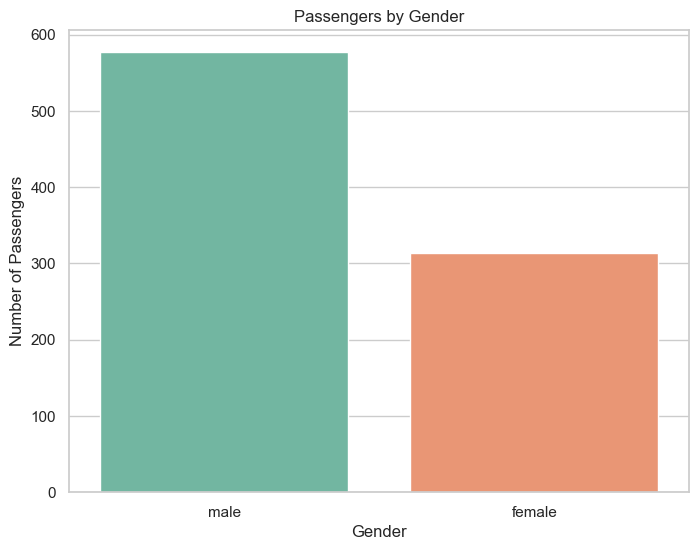

In [123]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Sex", palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Passengers by Gender")
plt.show()

### Survival by Gender

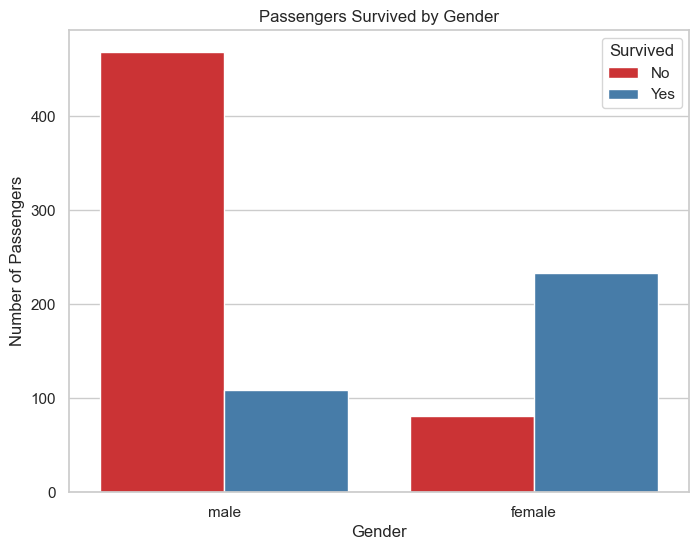

In [124]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Sex", hue="Survived", palette="Set1")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Gender")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

### Age Histograms

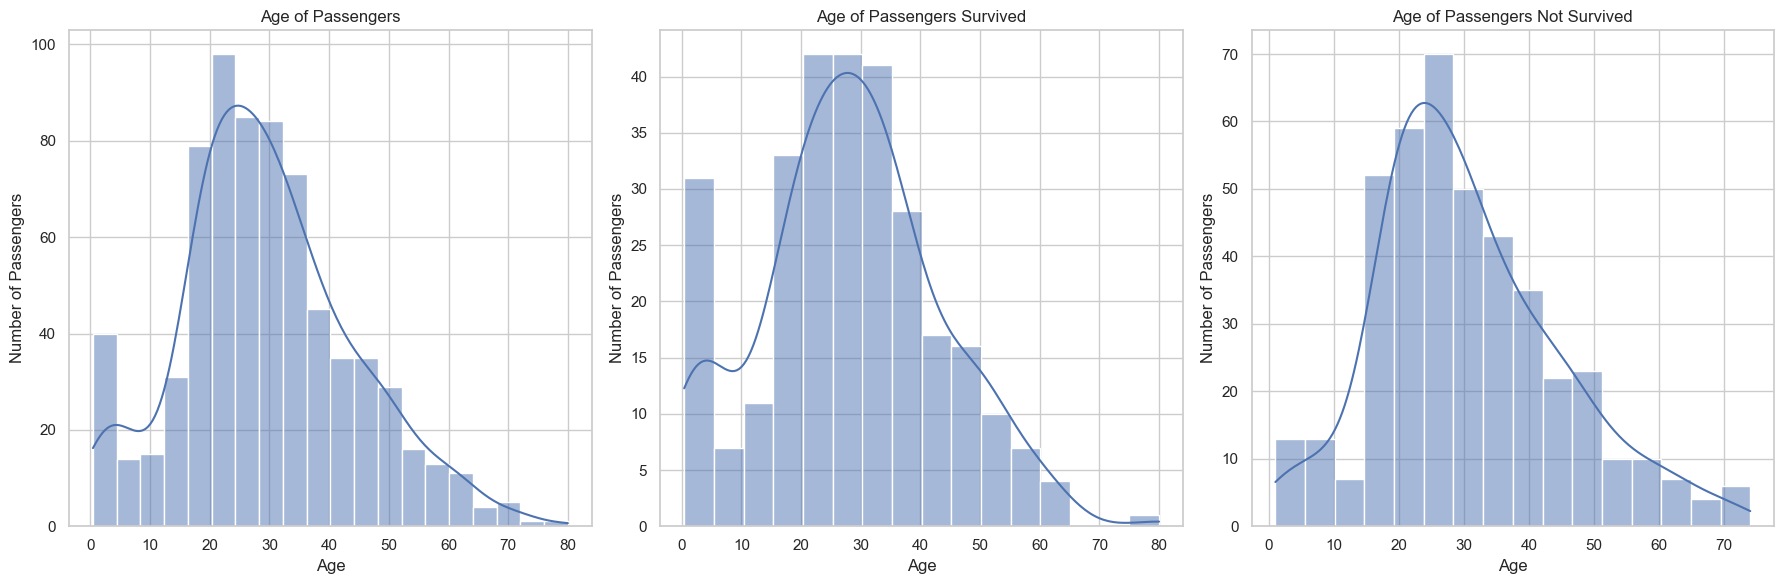

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total age histogram
sns.set(style="whitegrid")
sns.histplot(data=titanic, x="Age", kde=True, ax=axes[0])
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Number of Passengers")
axes[0].set_title("Age of Passengers")

# Age histogram of passengers who survived
sns.set(style="whitegrid")
sns.histplot(data=titanic[titanic['Survived'] == 1], x="Age", kde=True, ax=axes[1])
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Number of Passengers")
axes[1].set_title("Age of Passengers Survived")

# Age histogram of passengers who did not survive
sns.set(style="whitegrid")
sns.histplot(data=titanic[titanic['Survived'] == 0], x="Age", kde=True, ax=axes[2])
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Number of Passengers")
axes[2].set_title("Age of Passengers Not Survived")

plt.tight_layout()
plt.show()

### Survival by Age

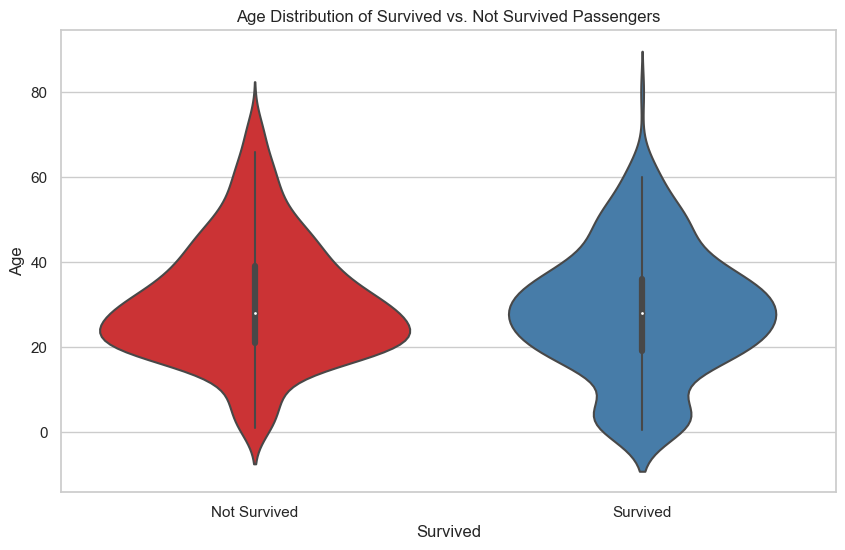

In [126]:
# Create a violin plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.violinplot(x="Survived", y="Age", data=titanic, palette="Set1")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("Age Distribution of Survived vs. Not Survived Passengers")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()

### Fare Distribution by Class

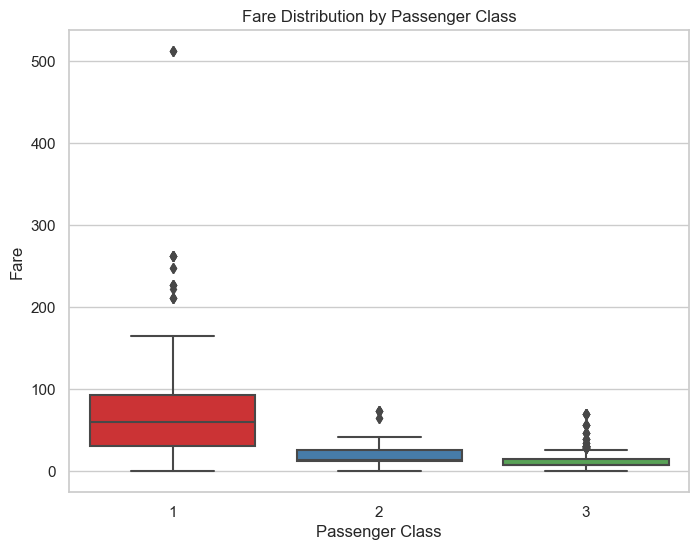

In [127]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=titanic, x="Pclass", y="Fare", palette="Set1")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.title("Fare Distribution by Passenger Class")
plt.show()

### Scatter Plot of Fare by Age

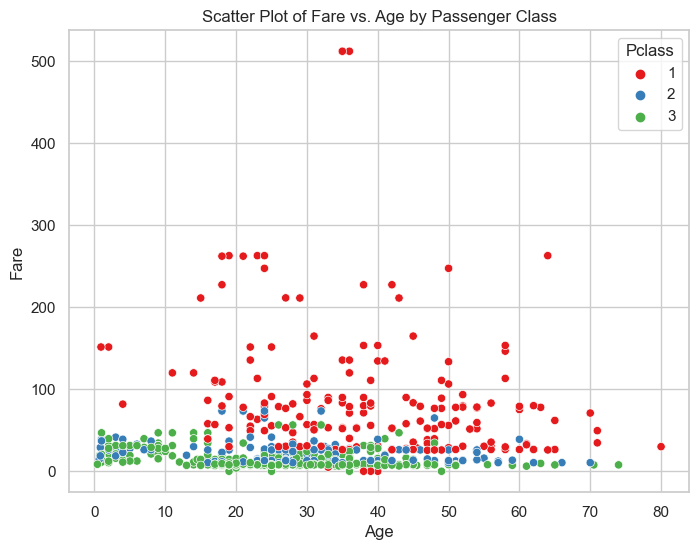

In [128]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Pclass", palette="Set1")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Fare vs. Age by Passenger Class")
plt.show()

### Survival by Embarked

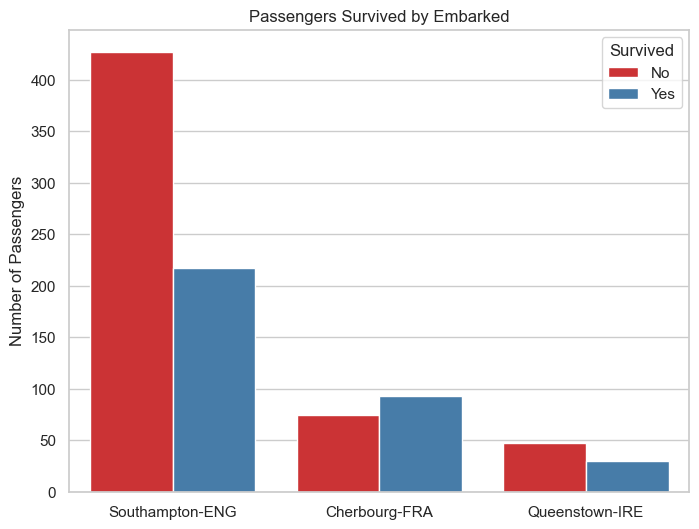

In [129]:
custom_labels = ['Southampton-ENG', 'Cherbourg-FRA', 'Queenstown-IRE']

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x="Embarked", hue="Survived", palette="Set1")
plt.xlabel("")
plt.ylabel("Number of Passengers")
plt.title("Passengers Survived by Embarked")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.xticks([0, 1, 2], custom_labels)
plt.show()  

## Predicting Survival

In [130]:
# Importing test and train data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


### Model building

In [137]:
warnings.filterwarnings("ignore")

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Adjust features as needed
y = train['Survived']

# Handle missing values and encode categorical variables
X['Age'].fillna(X['Age'].median(), inplace=True)  # Fill missing age values with median
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)  # Fill missing embarked values with mode
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(probability=True),  # Enable probability estimates for SVC
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    XGBClassifier(),
    LGBMClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    # Add more classification models as needed
]

# Dictionary to store metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'AUC': []}

# Iterate through each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Calculate ROC AUC if the model supports predict_proba
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc_value = auc(fpr, tpr)
    else:
        auc_value = None
    
    metrics['Model'].append(type(model).__name__)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['AUC'].append(auc_value)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Model evaluating

In [141]:
metrics_df = pd.DataFrame(metrics).sort_values(by='AUC', ascending=False)
metrics_df

,Model,Accuracy,Precision,Recall,AUC
1,RandomForestClassifier,0.815642,0.780822,0.770270,0.890541
7,LGBMClassifier,0.826816,0.794521,0.783784,0.885071
2,GradientBoostingClassifier,0.804469,0.819672,0.675676,0.880952
0,LogisticRegression,0.798883,0.771429,0.729730,0.879665
6,XGBClassifier,0.821229,0.800000,0.756757,0.874646
8,GaussianNB,0.770950,0.720000,0.729730,0.854698
9,AdaBoostClassifier,0.804469,0.767123,0.756757,0.854569
3,SVC,0.653631,0.750000,0.243243,0.807079
5,DecisionTreeClassifier,0.770950,0.720000,0.729730,0.789382
4,KNeighborsClassifier,0.715084,0.709091,0.527027,0.772329


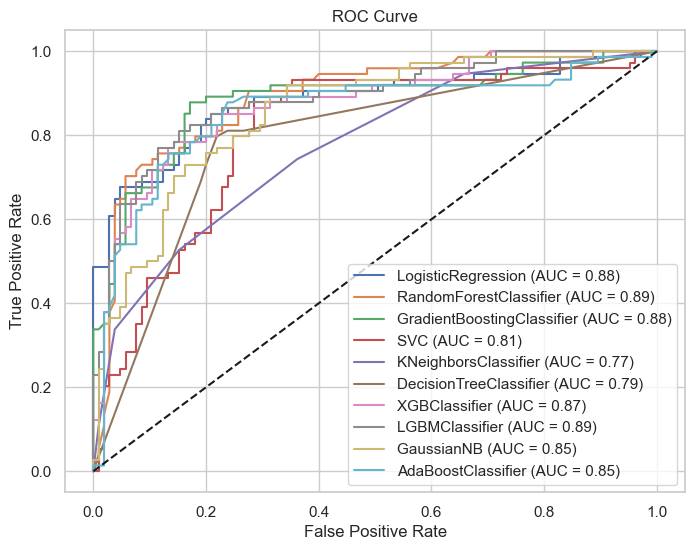

In [142]:
# Plot ROC curves for models that support predict_proba
plt.figure(figsize=(8, 6))
for model in models:
    if hasattr(model, 'predict_proba'):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc_value = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

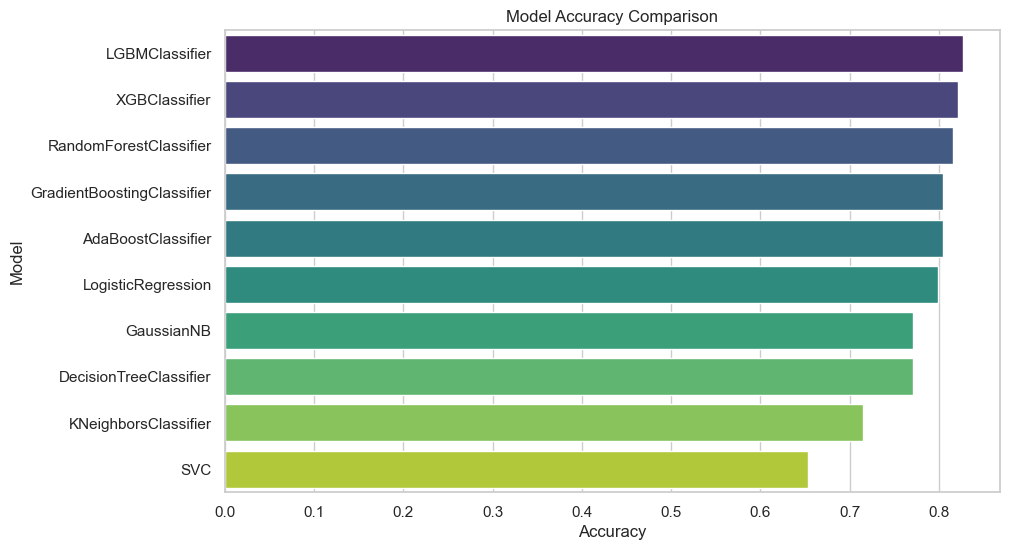

In [157]:
# Bar plot for accuracy
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df.sort_values(by='Accuracy', ascending=False), x='Accuracy', y='Model', palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.show()

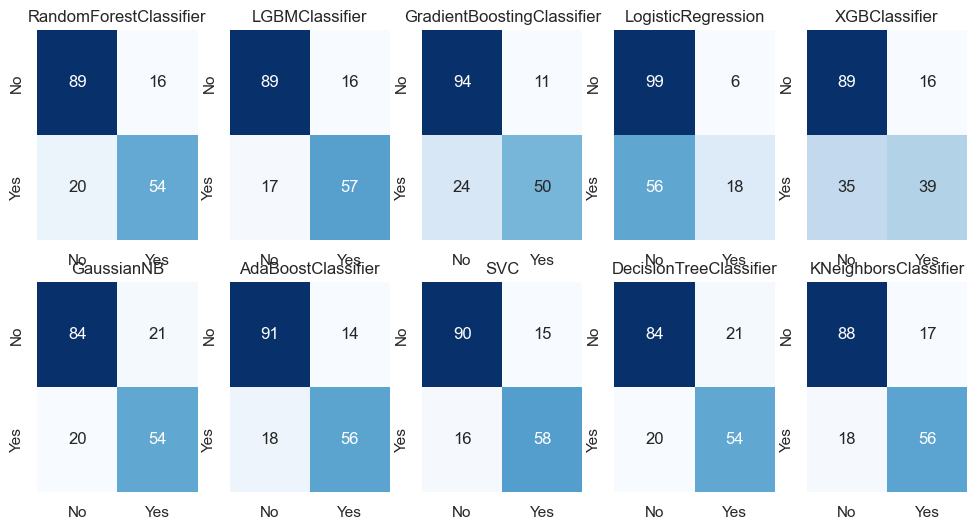

In [164]:
plt.figure(figsize=(12, 6))
for i, model_name in enumerate(metrics_df['Model']):
    plt.subplot(2, len(metrics_df) // 2, i + 1)
    model = models[i]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(model_name)

plt.show()

### Cross-Validation (k-fold)

In [148]:
model = RandomForestClassifier()
num_folds = 20

# Create a k-fold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the accuracy scores for each fold
for i, score in enumerate(cross_val_scores):
    score = score*100
    print(f'Fold {i + 1} Accuracy: {score:.2f}')

# Calculate and print the mean accuracy across all folds
mean_accuracy = cross_val_scores.mean()
print(f'Mean Accuracy: {mean_accuracy:.4f}')

Fold 1 Accuracy: 84.44
Fold 2 Accuracy: 82.22
Fold 3 Accuracy: 82.22
Fold 4 Accuracy: 77.78
Fold 5 Accuracy: 77.78
Fold 6 Accuracy: 73.33
Fold 7 Accuracy: 86.67
Fold 8 Accuracy: 68.89
Fold 9 Accuracy: 82.22
Fold 10 Accuracy: 88.89
Fold 11 Accuracy: 82.22
Fold 12 Accuracy: 88.64
Fold 13 Accuracy: 81.82
Fold 14 Accuracy: 70.45
Fold 15 Accuracy: 84.09
Fold 16 Accuracy: 79.55
Fold 17 Accuracy: 75.00
Fold 18 Accuracy: 79.55
Fold 19 Accuracy: 90.91
Fold 20 Accuracy: 86.36
Mean Accuracy: 0.8115


### Feature Importance

In [150]:
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Retrieve feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
importance_df

,Feature,Importance
4,Fare,0.268673
5,Sex_male,0.263869
1,Age,0.260139
0,Pclass,0.085652
2,SibSp,0.052736
3,Parch,0.038860
7,Embarked_S,0.019801
6,Embarked_Q,0.010270


### Grid Search and Hyperparameters

In [152]:
model = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Grid Search object with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model with the best hyperparameters
best_model = grid_search.best_estimator_

# Fit the best model to the data
best_model.fit(X_train, y_train)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy using the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Model:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Accuracy with Best Model: 0.8212290502793296


### Ensembling Models

In [154]:
# Initialize individual models
rf_model = RandomForestClassifier()
lgbm_model = LGBMClassifier()
gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()
nb_model = GaussianNB()
ada_model = AdaBoostClassifier()

# Create a VotingClassifier ensemble
ensemble_model = VotingClassifier(estimators=[
    ('RandomForest', rf_model),
    ('LGBM', lgbm_model),
    ('GradientBoosting', gb_model),
    ('XGBoost', xgb_model),
    ('GaussianNB', nb_model),
    ('AdaBoost', ada_model)
], voting='soft')  # 'soft' combines probabilities

# Fit the ensemble model to the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_test)

# Calculate accuracy with the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Ensemble Model:", accuracy)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [165]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
for model_name, fpr, tpr, auc_value in zip(metrics_df['Model'], fprs, tprs, auc_values):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

NameError: name 'fprs' is not defined

<Figure size 1000x600 with 0 Axes>